In [8]:

import pandas as pd
from generate_fake_patterns import (
    generate_baseline_series, 
    generate_baseline_and_predictions,
)
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
df = pd.read_csv("datasets/household_power_consumption.txt",delimiter=";")

/tmp/ipykernel_156241/534839069.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("datasets/household_power_consumption.txt",delimiter=";")


In [10]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


Available patterns:

Clean patterns: constant, linear_trend, exponential_trend, seasonal, seasonal_with_trend, multiple_seasonality, random_walk

Noisy patterns: constant_with_noise, linear_trend_with_noise, exponential_trend_with_noise, seasonal_with_noise, seasonal_with_trend_with_noise, multiple_seasonality_with_noise, random_walk_with_noise


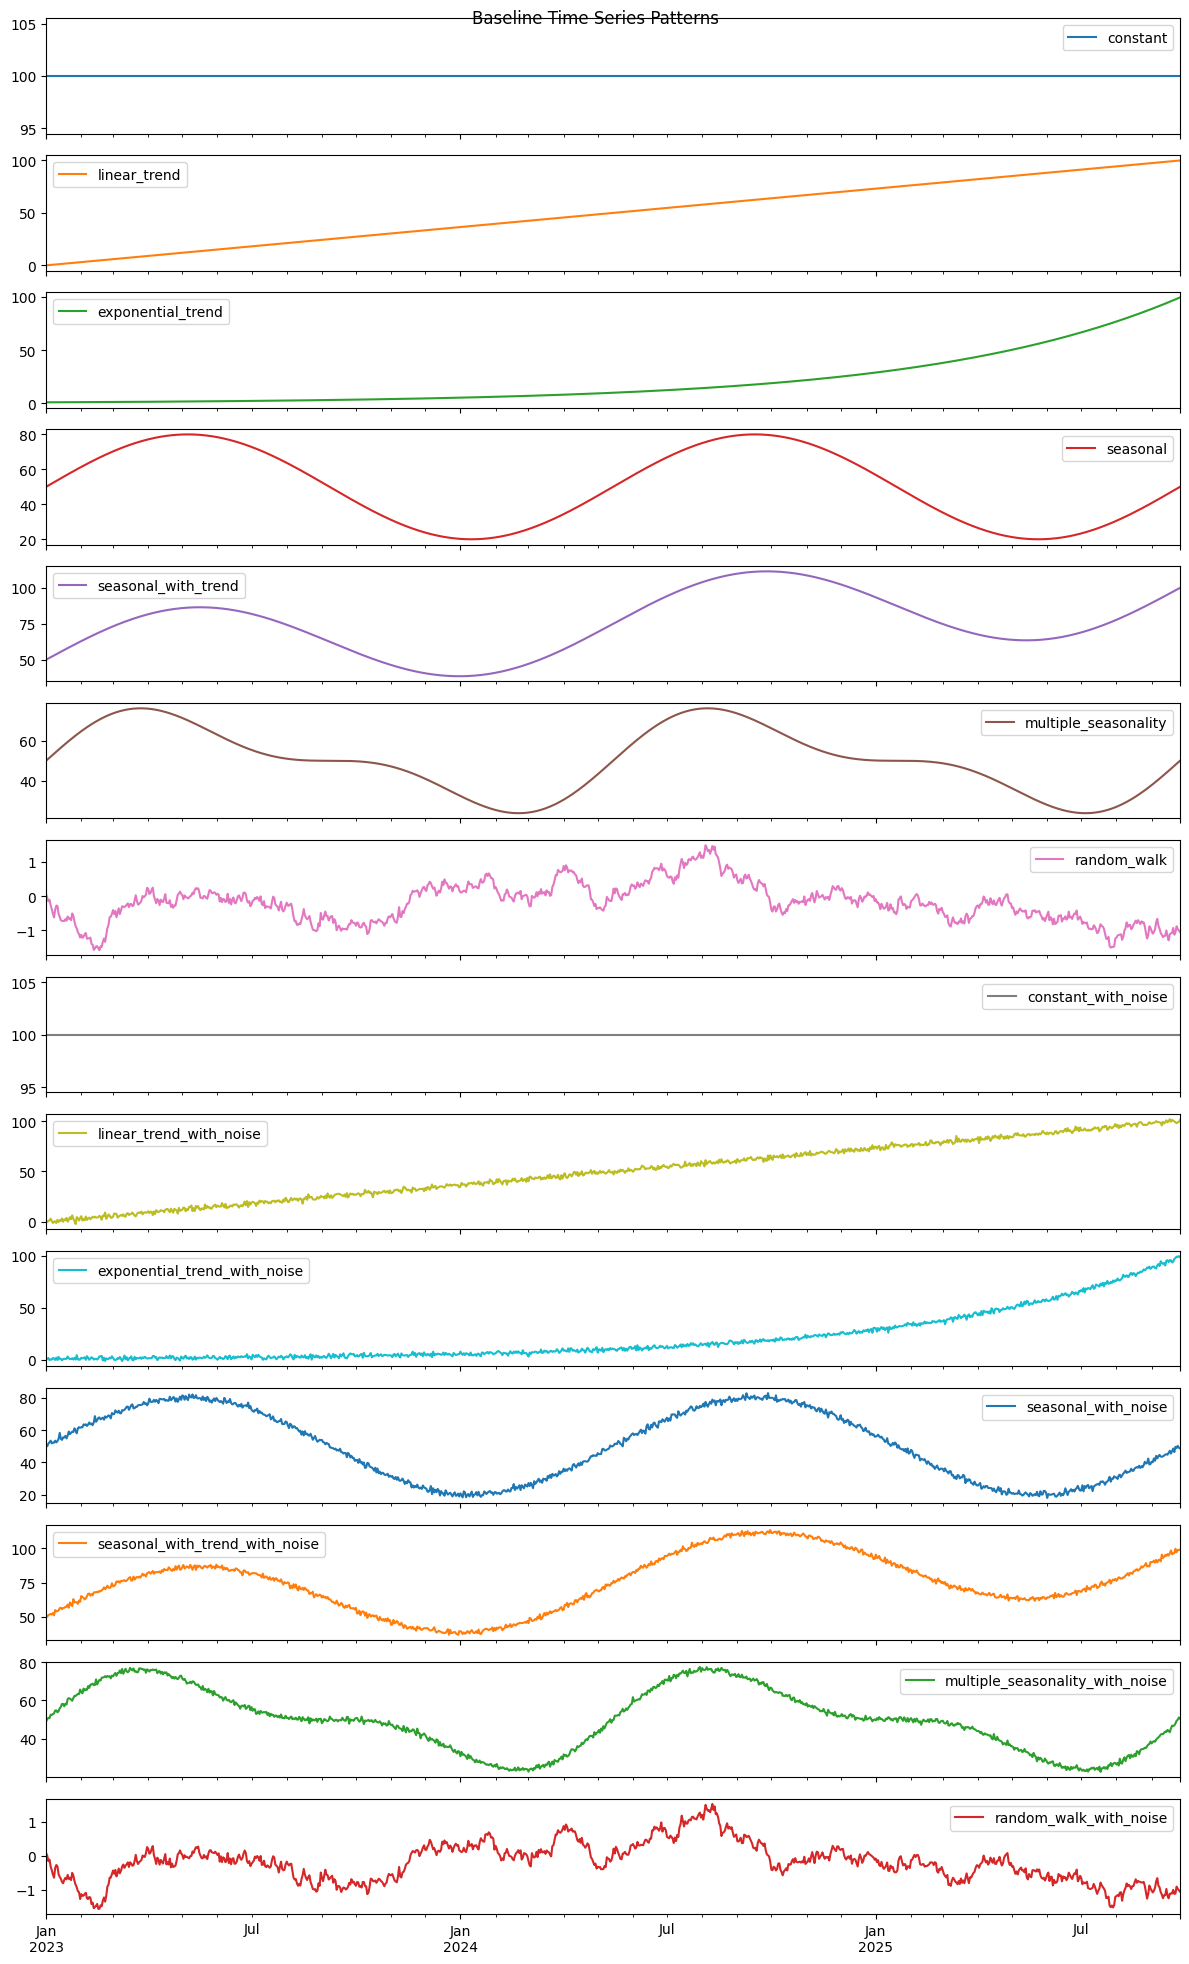

In [11]:
# Generate and plot
df = generate_baseline_series()
df.plot(subplots=True, figsize=(12, 20), title='Baseline Time Series Patterns')
plt.tight_layout()

print("Available patterns:")
print("\nClean patterns:", ', '.join(df.columns[:7]))
print("\nNoisy patterns:", ', '.join(df.columns[7:]))

In [14]:
df, metrics = generate_baseline_and_predictions()

df.columns



pattern_name: linear_trend
1000
1000
1000
1000
1000
1000
pattern over : linear_trend
{'perfect': {'MSE': 0.0, 'MAE': 0.0, 'Overlay_area': 1.0}, 'underestimate': {'MSE': 133.40006673340002, 'MAE': 9.999999999999998, 'Overlay_area': 0.8}, 'overestimate': {'MSE': 133.40006673340002, 'MAE': 9.999999999999998, 'Overlay_area': 0.8}, 'lagged': {'MSE': 99.19829739649556, 'MAE': 1.981981981981982, 'Overlay_area': 0.97}, 'nonlinear_bias': {'MSE': 20.030033366696692, 'MAE': 3.3350016683350017, 'Overlay_area': 0.94}, 'step_changes': {'MSE': 200.0, 'MAE': 10.0, 'Overlay_area': 0.8}}
pattern_name: seasonal
1000
1000
1000
1000
1000
1000
pattern over : seasonal
{'perfect': {'MSE': 0.0, 'MAE': 0.0, 'Overlay_area': 1.0}, 'amplitude_error': {'MSE': 802.5087138799231, 'MAE': 23.528765902233637, 'Overlay_area': 0.36}, 'phase_shift': {'MSE': 1143.521751266233, 'MAE': 27.733617114711127, 'Overlay_area': 0.33}, 'missed_peaks': {'MSE': 80.37669910695858, 'MAE': 5.079808044451684, 'Overlay_area': 0.83}, 'freque

/home/ubuntu/amine/forecaster/paper_experiments/generate_fake_patterns.py:114: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  'smoothed': lambda x: pd.Series(x).rolling(5).mean().fillna(method='bfill'),


1000
1000
1000
1000
1000
pattern over : random_walk
{'perfect': {'MSE': 0.0, 'MAE': 0.0, 'Overlay_area': 1.0}, 'smoothed': {'MSE': 0.01356257080151456, 'MAE': 0.09149197929364611, 'Overlay_area': 0.99}, 'delayed': {'MSE': 0.3258316834242188, 'MAE': 0.17323281802074, 'Overlay_area': 0.97}, 'noisy': {'MSE': 0.0655136878805834, 'MAE': 0.20406833190034307, 'Overlay_area': 0.97}, 'trend_biased': {'MSE': 2.19254365406266, 'MAE': 1.2820238396258992, 'Overlay_area': 0.76}, 'regime_shifts': {'MSE': 1.6567338063720862, 'MAE': 0.3230700075857266, 'Overlay_area': 0.94}}
pattern_name: multiple_seasonality
1000
1000
1000
1000
pattern over : multiple_seasonality
{'perfect': {'MSE': 0.0, 'MAE': 0.0, 'Overlay_area': 1.0}, 'missing_short_cycle': {'MSE': 360.44999459320735, 'MAE': 15.441186653848497, 'Overlay_area': 0.49}, 'amplitude_ratio_error': {'MSE': 419.5011376359246, 'MAE': 16.927887109994142, 'Overlay_area': 0.45}, 'noisy': {'MSE': 8.70726642215837, 'MAE': 2.3726271296846964, 'Overlay_area': 0.92

Index(['linear_trend_baseline', 'linear_trend_perfect',
       'linear_trend_underestimate', 'linear_trend_overestimate',
       'linear_trend_lagged', 'linear_trend_nonlinear_bias',
       'linear_trend_step_changes', 'seasonal_baseline', 'seasonal_perfect',
       'seasonal_amplitude_error', 'seasonal_phase_shift',
       'seasonal_missed_peaks', 'seasonal_frequency_error',
       'seasonal_asymmetric_error', 'random_walk_baseline',
       'random_walk_perfect', 'random_walk_smoothed', 'random_walk_delayed',
       'random_walk_noisy', 'random_walk_trend_biased',
       'random_walk_regime_shifts', 'multiple_seasonality_baseline',
       'multiple_seasonality_perfect',
       'multiple_seasonality_missing_short_cycle',
       'multiple_seasonality_amplitude_ratio_error',
       'multiple_seasonality_noisy', 'trend_change_baseline',
       'trend_change_perfect', 'trend_change_missed_reversal',
       'trend_change_late_detection', 'trend_change_overreaction',
       'cyclic_with_tren

In [15]:
df

,linear_trend_baseline,linear_trend_perfect,linear_trend_underestimate,linear_trend_overestimate,linear_trend_lagged,linear_trend_nonlinear_bias,linear_trend_step_changes,seasonal_baseline,seasonal_perfect,seasonal_amplitude_error,...,cyclic_with_trend_perfect,cyclic_with_trend_trend_only,cyclic_with_trend_cycle_only,cyclic_with_trend_magnitude_error,exponential_growth_baseline,exponential_growth_perfect,exponential_growth_linear_approximation,exponential_growth_underestimate,exponential_growth_delayed_response,exponential_growth_noisy
2023-01-01,0.0000,0.0000,0.00000,0.00000,99.099099,0.000000,0.0000,50.000000,50.000000,44.752503,...,-20.000000,0.0000,62.676046,6.338023,1.000000,1.000000,1.000000,1.000000,2.588170,1.114084
2023-01-02,0.1001,0.1001,0.08008,0.12012,99.199199,0.100110,0.1001,50.377359,50.377359,52.232857,...,-19.819820,0.1001,63.823108,7.011654,1.001002,1.001002,1.001720,1.000801,2.590762,1.049438
2023-01-03,0.2002,0.2002,0.16016,0.24024,99.299299,0.200240,0.2002,50.754657,50.754657,59.397954,...,-19.639640,0.2002,64.970171,7.685286,1.002004,1.002004,1.003440,1.001603,2.593356,0.994651
2023-01-04,0.3003,0.3003,0.24024,0.36036,99.399399,0.300390,0.3003,51.131837,51.131837,65.239461,...,-19.459459,0.3003,66.117233,8.358917,1.003008,1.003008,1.005160,1.002405,2.595954,1.017501
2023-01-05,0.4004,0.4004,0.32032,0.48048,99.499499,0.400561,0.4004,51.508837,51.508837,68.937365,...,-19.279279,0.4004,67.264296,9.032548,1.004012,1.004012,1.006880,1.003208,2.598554,1.000883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-22,99.5996,99.5996,79.67968,119.51952,98.598599,109.519680,119.5996,48.491163,48.491163,30.412789,...,119.279279,99.5996,69.355476,109.277338,2.707420,2.707420,2.711402,2.218423,2.575248,2.682273
2025-09-23,99.6997,99.6997,79.75976,119.63964,98.698699,109.639730,119.6997,48.868163,48.868163,30.300189,...,119.459459,99.6997,30.502539,89.950969,2.710131,2.710131,2.713122,2.220201,2.577827,2.529208
2025-09-24,99.7998,99.7998,79.83984,119.75976,98.798799,109.759800,119.7998,49.245343,49.245343,32.956376,...,119.639640,99.7998,31.649602,90.624601,2.712845,2.712845,2.714842,2.221979,2.580409,2.912466
2025-09-25,99.8999,99.8999,79.91992,119.87988,98.898899,109.879890,119.8999,49.622641,49.622641,38.010564,...,119.819820,99.8999,32.796664,91.298232,2.715562,2.715562,2.716562,2.223759,2.582993,2.940328


In [ ]:
# exponential seems to give back WEIRRRRD cases

In [26]:
n_points = 1000
x = np.linspace(0, 4*np.pi, n_points)
patterns = {
        #'constant': (np.ones(n_points) * 100, {
        #    'perfect': lambda x: x,
        #    'noisy': lambda x: x + np.random.normal(0, 5, n_points),
        #    'biased': lambda x: x * 1.1,
        #    'delayed': lambda x: np.roll(x, 5),
        #    'outliers': lambda x: x + np.where(np.random.random(n_points) > 0.98, 50, 0),
        #    'missing_values': lambda x: np.where(np.random.random(n_points) > 0.95, np.nan, x)
        #}),
        
        'linear_trend': (np.linspace(0, 100, n_points), {
            'perfect': lambda x: x,
            'underestimate': lambda x: x * 0.8,
            'overestimate': lambda x: x * 1.2,
            'lagged': lambda x: np.roll(x, 10),
            'nonlinear_bias': lambda x: x + 0.001 * x**2,
            'step_changes': lambda x: x + np.where(x > 50, 20, 0)
        }),
        
        'seasonal': (50 + 30 * np.sin(x), {
            'perfect': lambda x: x,
            'amplitude_error': lambda x: 50 + 20 * np.sin(x),
            'phase_shift': lambda x: 50 + 30 * np.sin(x + 0.5),
            'missed_peaks': lambda x: np.where(x > 60, 60, x),
            'frequency_error': lambda x: 50 + 30 * np.sin(1.1 * x),
            'asymmetric_error': lambda x: x + np.where(np.sin(x) > 0, 5, -2)
        }),
        
        'random_walk': (np.cumsum(np.random.normal(0, 0.1, n_points)), {
            'perfect': lambda x: x,
            'smoothed': lambda x: pd.Series(x).rolling(5).mean().fillna(method='bfill'),
            'delayed': lambda x: np.roll(x, 3),
            'noisy': lambda x: x + np.random.normal(0, x.std()*0.1, n_points),
            'trend_biased': lambda x: x + np.linspace(0, x.std(), n_points),
            'regime_shifts': lambda x: x + np.where(np.random.random(n_points) > 0.95, x.std()*2, 0)
        }),
        
        'multiple_seasonality': (
            50 + 20 * np.sin(x) + 10 * np.sin(7*x), {
            'perfect': lambda x: x,
            'missing_short_cycle': lambda x: 50 + 20 * np.sin(x),
            'amplitude_ratio_error': lambda x: 50 + 15 * np.sin(x) + 15 * np.sin(7*x),
            'noisy': lambda x: x + np.random.normal(0, 3, n_points)
        }),
        
        'trend_change': (
            np.concatenate([
                np.linspace(0, 50, n_points//2),
                np.linspace(50, 30, n_points-n_points//2)
            ]), {
            'perfect': lambda x: x,
            'missed_reversal': lambda x: np.concatenate([
                np.linspace(0, 50, n_points//2),
                np.linspace(50, 50, n_points-n_points//2)
            ]),
            'late_detection': lambda x: np.roll(x, n_points//10),
            'overreaction': lambda x: x * np.where(np.arange(n_points) > n_points//2, 0.7, 1.0)
        }),
        
        'cyclic_with_trend': (
            np.linspace(0, 100, n_points) + 20 * signal.sawtooth(x), {
            'perfect': lambda x: x,
            'trend_only': lambda x: np.linspace(0, 100, n_points),
            'cycle_only': lambda x: 50 + 20 * signal.sawtooth(x),
            'magnitude_error': lambda x: np.linspace(0, 100, n_points) + 10 * signal.sawtooth(x)
        }),
        
        'exponential_growth': (
            np.exp(np.linspace(0, 1, n_points)), {
            'perfect': lambda x: x,
            'linear_approximation': lambda x: np.linspace(1, np.max(x), n_points),
            'underestimate': lambda x: x**0.8,
            'delayed_response': lambda x: np.roll(x, n_points//20),
            'noisy': lambda x: x * (1 + np.random.normal(0, 0.05, n_points))
        })
    } 

In [27]:
exp_growth_df = pd.DataFrame(
    {
        "baseline" : patterns["exponential_growth"][0],
        "perfect" : patterns["exponential_growth"][1]["perfect"](patterns["exponential_growth"][0]),
        "linear_approximation" : patterns["exponential_growth"][1]["linear_approximation"](patterns["exponential_growth"][0]),
        "underestimate" : patterns["exponential_growth"][1]["underestimate"](patterns["exponential_growth"][0]),
        "delayed_response" : patterns["exponential_growth"][1]["delayed_response"](patterns["exponential_growth"][0]),
        "noisy" : patterns["exponential_growth"][1]["noisy"](patterns["exponential_growth"][0]),
    }
)

In [4]:
exp_growth_df

,baseline,perfect,linear_approximation,underestimate,delayed_response,noisy
0,1.000000,1.000000,1.000000,1.000000,2.588170,1.008260
1,1.001002,1.001002,1.001720,1.000801,2.590762,0.924531
2,1.002004,1.002004,1.003440,1.001603,2.593356,1.091922
3,1.003008,1.003008,1.005160,1.002405,2.595954,1.007567
4,1.004012,1.004012,1.006880,1.003208,2.598554,1.032642
...,...,...,...,...,...,...
995,2.707420,2.707420,2.711402,2.218423,2.575248,2.619614
996,2.710131,2.710131,2.713122,2.220201,2.577827,2.655513
997,2.712845,2.712845,2.714842,2.221979,2.580409,2.735523
998,2.715562,2.715562,2.716562,2.223759,2.582993,2.606880


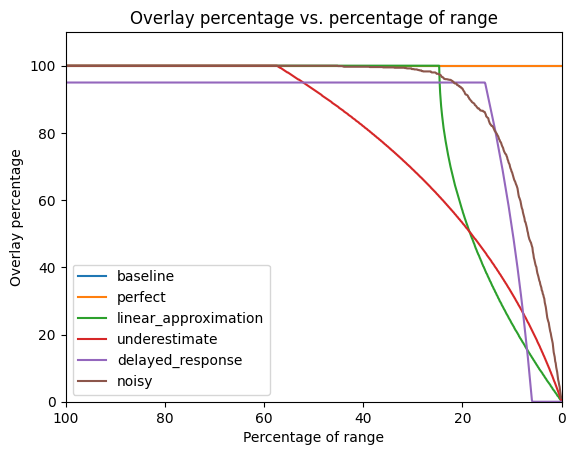

In [5]:
from src.processing_forecasts.metrics import Evaluate

metric_exp = Evaluate(target_values=exp_growth_df["baseline"],prediction=None).overlay_dx_visualisation_df(forecasts_df=exp_growth_df,max_percentage=100,min_percentage=0,step=0.1)